Como primer paso para este análisis, realizamos la carga de las librerías que se utilizarán en el análisis.

In [1]:
# Carga de librerías necesarias

import pandas as pd # Manipulación de datos
import numpy as np # Operaciones matemáticas y estadísticas 
import requests # Para hacer solicitudes HTTP a la API de Yelp 
import ast # Para evaluar cadenas que representan estructuras de datos de Python (como listas o diccionarios) y convertirlas en objetos de Python reales



A continuación, utilizo la ID de cliente y la API KEY (clave), proporcionadas por los docentes, para realizar la autenticación en la API de Yelp.

In [2]:
# Variables de configuración para la API de Yelp

url = "https://api.yelp.com/v3/businesses/search" # URL desde donde se obtendrán los datos 
cliente_id = 'GWOCZh9-BmZxtdsAjr7Gug' # ID del cliente.
api_key = 'FHVvXoNmTXIl9DuxYis7AV5uLPujm9MLwrhgs5NgvCfaOxd3V6mxt6dQU8eEqYJiGxe816XATx7ufWjbMWqbV-2Uku1jxBJv8BGRC74NroLPl27PDQqs0tDixit-YHYx' # Clave de API.

Especifico las variables *headers*, *ciudad* y *params* para la solicitud.

In [3]:
# Variables adicionales para la solicitud

headers = {'Authorization':'Bearer %s'%api_key} # Encabezados para la solicitud HTTP, incluyendo la autorización con la clave de API
ciudad = 'Chicago' # Ciudad para la cual se desean obtener los datos de restaurantes
params = {'term':'restaurants', 'location':ciudad, 'limit':50} # Parámetros para la solicitud, buscando restaurantes en la ciudad especificada, con un límite de 50 resultados por solicitud

Se realiza la solicitud GET a la API de Yelp con la URL, parámetros y encabezados especificados. 'limit':50 indica que solo traiga 50 resultados. Luego, la response mostrará la respuesta de la solicitud para verificar que se haya realizado correctamente (código 200 indica éxito).

In [4]:
# Realizar la solicitud GET a la API de Yelp

response = requests.get(url=url, params=params, headers=headers) # Realizar la solicitud GET a la API de Yelp.
response # Mostrar la respuesta.

<Response [200]>

El siguiente código realiza consultas a una **API de restaurantes** (ej. Yelp) y guarda los resultados en un archivo CSV.  

Flujo general:
1. Se consultan los datos en bloques de 50 resultados (paginación).
2. Todos los resultados se almacenan en una lista.
3. Se normalizan a un DataFrame de pandas.
4. Se exportan a un archivo CSV para análisis posterior.

---

Explicación línea por línea:

```python
# Lista para almacenar todos los resultados obtenidos de la API 
#1 Se inicializa una lista vacía donde se irán guardando todos los restaurantes obtenidos de la API.
all_results = []  

#2 Se utiliza un bucle for para iterar desde 0 hasta 1000, avanzando de 50 en 50.

#3 Se construye un diccionario con los parámetros de búsqueda:
term: qué buscar (en este caso "restaurants").
location: la ciudad que definimos en la variable ciudad.
limit: cantidad de resultados por página (máximo permitido: 50).
offset: desde qué posición empezar a traer resultados.

#4 Se hace la solicitud GET a la API con los parámetros definidos.

#5 La respuesta (response) se convierte en formato JSON (data).

#6 Se obtienen los negocios ('businesses') de la respuesta y se agregan a la lista all_results.
Si no existen negocios, se agrega una lista vacía.

#7 Si la API devuelve menos de 50 resultados, significa que ya no hay más datos disponibles y el bucle se detiene.

#8 Se cierra el ciclo de iteraciones.

#9 Se normaliza la lista de diccionarios (all_results) en un DataFrame de pandas, lo que facilita su análisis.

#10 Se guarda el DataFrame en un archivo CSV llamado chicago_restaurantes.csv.
La opción index=False evita incluir la columna del índice de pandas.

In [5]:
all_results = [] #1 Creación de la lista vacía.

for offset in range(0, 1000, 50):  #2 Iteración con un desplazamiento de 50 en 50 hasta 1000.
    params = {'term': 'restaurants', 'location': ciudad, 'limit': 50, 'offset': offset} #3 Actualización de los parámetros
    response = requests.get(url, params=params, headers=headers) #4 Solicitud GET con los nuevos parámetros.
    data = response.json() #5 Conversión de la respuesta al formato JSON.
    all_results.extend(data.get('businesses', [])) #6 Agregar los negocios a la lista (información de los restaurantes, en formato .csv).
    
    if len(data.get('businesses', [])) < 50: #7 Si se obtienen menos de 50 resultados.
        break  #8 Parar el ciclo, ya que no hay más datos disponibles.

df = pd.json_normalize(all_results) #9 Normalizar los datos JSON para convertirlos en un DataFrame de pandas. 
df.to_csv('chicago_restaurantes.csv', index=False) #10 Guardar el DataFrame en un archivo CSV sin incluir el índice, esto para no ejecutar nuevamente la API y tener los datos guardados localmente 

**Exploracion del DataFrame**

Ya pudimos obtener los resultados de los *requests* de la API y los convertimos a un archivo .csv. 

A continuación ==> **exploración inicial**, cuyo objetivo es asegurar la **calidad de los datos**, identificando posibles inconsistencias, valores nulos, columnas redundantes o cualquier otro problema que pueda afectar el análisis posterior. 

In [15]:
df_original = pd.read_csv('chicago_restaurantes.csv') # Cargamos el DataFrame desde el archivo .csv guardado previamente.
df_res3 = df_original.copy() # Creamos una copia del DataFrame original para trabajar con él sin modificar el original.
df_res3

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,41.884193,-87.647946,809 W Randolph,NaN,NaN,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']"
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,41.890694,-87.624782,444 N Michigan Ave,NaN,NaN,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']"
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,41.881689,-87.625006,12 S Michigan Ave,NaN,NaN,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']"
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,41.917275,-87.698577,2833 W Armitage Ave,NaN,NaN,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']"
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,41.884680,-87.642322,564 W Randolph St,NaN,NaN,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,False,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",...,41.915105,-87.684639,1865 N Milwaukee Ave,NaN,NaN,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']"
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,False,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",...,41.915980,-87.687550,1904 N Western Ave,NaN,NaN,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']"
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,False,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],...,41.854051,-87.685490,2023 S Western Ave,NaN,NaN,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']"
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,False,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",...,41.943240,-87.653001,3355 N Clark St,NaN,NaN,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']"


Luego, necesito conocer las dimensiones del DataFrame, es decir, cuántas filas y columnas tiene, para lo cual utilizo la función ".shape". Esto nos da una idea del volúmen de datos con el cual trabajaré.

In [16]:
print(f"El DataFrame tiene {df_res3.shape[0]} filas y {df_res3.shape[1]} columnas.") # 0 para filas, 1 para columnas

El DataFrame tiene 200 filas y 24 columnas.


Con la función ".head" visualizo las primeras filas (10 en este caso) del DataFrame, con la finalodad de observar la estructura del DataFrame a partir de una muestra de él. 

In [17]:
df_res3.head(10)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,41.884193,-87.647946,809 W Randolph,NaN,NaN,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']"
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,41.890694,-87.624782,444 N Michigan Ave,NaN,NaN,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']"
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,41.881689,-87.625006,12 S Michigan Ave,NaN,NaN,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']"
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,41.917275,-87.698577,2833 W Armitage Ave,NaN,NaN,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']"
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,41.884680,-87.642322,564 W Randolph St,NaN,NaN,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']"
5,VPJk-SEWSWS_nGoQvM-COw,penumbra-chicago,Penumbra,https://s3-media0.fl.yelpcdn.com/bphoto/IlSPQK...,False,https://www.yelp.com/biz/penumbra-chicago?adju...,994,"[{'alias': 'wine_bars', 'title': 'Wine Bars'},...",4.8,"['restaurant_reservation', 'delivery']",...,41.924459,-87.710898,3309 W Fullerton Ave,NaN,NaN,Chicago,60647,US,IL,"['3309 W Fullerton Ave', 'Chicago, IL 60647']"
6,GZsrGq6H8CQ4YlGtE_Bm0Q,ciccio-mio-chicago-2,Ciccio Mio,https://s3-media0.fl.yelpcdn.com/bphoto/svYjuC...,False,https://www.yelp.com/biz/ciccio-mio-chicago-2?...,578,"[{'alias': 'italian', 'title': 'Italian'}]",4.7,['delivery'],...,41.889390,-87.635240,226 W Kinzie,NaN,NaN,Chicago,60654,US,IL,"['226 W Kinzie', 'Chicago, IL 60654']"
7,PZe0q_153VHUnaR-8dOTJg,the-dearborn-chicago-2,The Dearborn,https://s3-media0.fl.yelpcdn.com/bphoto/eSXeGi...,False,https://www.yelp.com/biz/the-dearborn-chicago-...,2612,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,"['pickup', 'delivery']",...,41.884253,-87.629315,145 N Dearborn St,NaN,NaN,Chicago,60602,US,IL,"['145 N Dearborn St', 'Chicago, IL 60602']"
8,xoi7Cw7FoknAx5p880RtWQ,au-cheval-chicago,Au Cheval,https://s3-media0.fl.yelpcdn.com/bphoto/hMkEoe...,False,https://www.yelp.com/biz/au-cheval-chicago?adj...,9333,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.4,"['pickup', 'delivery']",...,41.884660,-87.647668,800 W Randolph St,NaN,NaN,Chicago,60607,US,IL,"['800 W Randolph St', 'Chicago, IL 60607']"
9,ngB0iQM1Yz7Nx_tQZqU7NA,daisies-chicago,Daisies,https://s3-media0.fl.yelpcdn.com/bphoto/FnAf20...,False,https://www.yelp.com/biz/daisies-chicago?adjus...,696,"[{'alias': 'pastashops', 'title': 'Pasta Shops...",4.3,"['pickup', 'delivery']",...,41.924444,-87.699647,2375 N Milwaukee Ave,NaN,NaN,Chicago,60647,US,IL,"['2375 N Milwaukee Ave', 'Chicago, IL 60647']"


Listamos el nombre y la cantidad total de columnas del DataFrame, información que resulta esencial para tener una visión clara de la estructura de nuestro DataFrame.

In [18]:
for i, column in enumerate(df_res3.columns, 1):
    print(f"{i} : {column}")

1 : id
2 : alias
3 : name
4 : image_url
5 : is_closed
6 : url
7 : review_count
8 : categories
9 : rating
10 : transactions
11 : price
12 : phone
13 : display_phone
14 : distance
15 : coordinates.latitude
16 : coordinates.longitude
17 : location.address1
18 : location.address2
19 : location.address3
20 : location.city
21 : location.zip_code
22 : location.country
23 : location.state
24 : location.display_address


Consulto cuáles de las columnas del DataFrame son numéricas y cuáles son categóricas, ya que esto me permitirá anticipar qué funciones o herramientas utilizar para tratar los datos.

In [19]:
# Identificar columnas categóricas

columnas_categoricas = df_res3.select_dtypes(include='object').columns.tolist() # Clasifica por tipo de dato y devuelve una lista, object para cadenas de texto
print("Columnas categóricas:", columnas_categoricas)
print("Número de columnas categóricas:", len(columnas_categoricas))

# Identificar columnas numéricas

columnas_numericas = df_res3.select_dtypes(include='number').columns.tolist() # number para tipos numéricos
print("Columnas numéricas:", columnas_numericas)
print("Número de columnas numéricas:", len(columnas_numericas))

Columnas categóricas: ['id', 'alias', 'name', 'image_url', 'url', 'categories', 'transactions', 'price', 'display_phone', 'location.address1', 'location.address2', 'location.address3', 'location.city', 'location.country', 'location.state', 'location.display_address']
Número de columnas categóricas: 16
Columnas numéricas: ['review_count', 'rating', 'phone', 'distance', 'coordinates.latitude', 'coordinates.longitude', 'location.zip_code']
Número de columnas numéricas: 7


A continuación, es conveniente consultar y mostrar información más técnica del DataFrame, lo que nos ayudará a identificar qué columnas o valores requieren limpieza y normalización.

In [20]:
df_res3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        200 non-null    object 
 1   alias                     200 non-null    object 
 2   name                      200 non-null    object 
 3   image_url                 200 non-null    object 
 4   is_closed                 200 non-null    bool   
 5   url                       200 non-null    object 
 6   review_count              200 non-null    int64  
 7   categories                200 non-null    object 
 8   rating                    200 non-null    float64
 9   transactions              200 non-null    object 
 10  price                     139 non-null    object 
 11  phone                     188 non-null    float64
 12  display_phone             188 non-null    object 
 13  distance                  200 non-null    float64
 14  coordinate

Con la función ".describe" de la librería *Pandas* obtengo la información técnica y estadística del DataFrame. El término "all" incluye todos los datos.

In [21]:
df_res3.describe(include='all')

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
count,200,200,200,200,200,200,200.000000,200,200.000000,200,...,200.000000,200.000000,199,12,1,200,200.00000,200,200,200
unique,199,199,199,199,1,199,NaN,180,NaN,10,...,NaN,NaN,196,12,1,2,NaN,1,1,197
top,wVLyIMBELu9qUH4s2bhbjw,casa-tulum-chicago,Casa Tulum,https://s3-media0.fl.yelpcdn.com/bphoto/BWRmkI...,False,https://www.yelp.com/biz/casa-tulum-chicago?ad...,NaN,"[{'alias': 'italian', 'title': 'Italian'}]",NaN,"['pickup', 'delivery']",...,NaN,NaN,59 W Hubbard St,Fl 3,Willis Tower,Chicago,NaN,US,IL,"['59 W Hubbard St', 'Chicago, IL 60654']"
freq,2,2,2,2,200,2,NaN,5,NaN,56,...,NaN,NaN,2,1,1,199,NaN,200,200,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,849.365000,NaN,4.411500,NaN,...,41.903011,-87.655419,NaN,NaN,NaN,NaN,60624.50500,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1599.799118,NaN,0.243545,NaN,...,0.027121,0.026981,NaN,NaN,NaN,NaN,18.56511,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,3.500000,NaN,...,41.846210,-87.727950,NaN,NaN,NaN,NaN,60601.00000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,93.250000,NaN,4.300000,NaN,...,41.886591,-87.676677,NaN,NaN,NaN,NaN,60610.00000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,281.500000,NaN,4.400000,NaN,...,41.899556,-87.649648,NaN,NaN,NaN,NaN,60620.00000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,805.000000,NaN,4.600000,NaN,...,41.917287,-87.631799,NaN,NaN,NaN,NaN,60647.00000,NaN,NaN,NaN


**Principales hallazgos tras la exploración inicial del DataFrame de restaurantes en Chicago**

Después de analizar el DataFrame obtenido de la API de Yelp, se identificaron los siguientes puntos clave para orientar el proceso de limpieza y transformación:

- **Tamaño del dataset:** El DataFrame cuenta con 200 filas y 24 columnas, lo que proporciona una muestra adecuada para análisis exploratorios y posteriores modelados.
- **Tipos de variables:** Se detectaron 16 columnas categóricas y 7 columnas numéricas, permitiendo realizar tanto análisis descriptivos como inferenciales.
- **Valores nulos:** Varias columnas presentan valores faltantes, especialmente `price`, `phone` e `image_url`. Destaca que la columna `price` tiene cerca del 35% de valores nulos, lo que puede afectar la calidad del análisis si no se trata adecuadamente.
- **Redundancia de información:** Existen columnas con información duplicada, como las diferentes variantes de dirección (`location.address1`, `location.address2`, `location.address3`, `location.display_address`) y teléfono (`phone`, `display_phone`). Esto sugiere la necesidad de unificar y depurar estas variables para evitar inconsistencias.
- **Tipos de datos incorrectos:** Algunas columnas no tienen el tipo de dato adecuado. Por ejemplo, `phone` aparece como numérico cuando debería ser texto, y columnas como `categories` y `transactions` están en formato string representando listas o diccionarios.
- **Columnas irrelevantes:** Algunas variables, como `distance` e `is_closed`, no aportan información útil para el análisis y pueden eliminarse para simplificar el DataFrame.
- **Transformación de variables:** La columna `price` utiliza símbolos (`$`, `$$`, etc.) para representar rangos de precios, por lo que es necesario transformarla a valores numéricos para facilitar el análisis.
- **Información valiosa en categorías:** La columna `categories` contiene datos relevantes sobre el tipo de restaurante, pero requiere transformación para ser utilizada eficientemente en análisis posteriores.
- **Imputación inteligente:** Es fundamental imputar los valores faltantes, especialmente en `price`, de manera informada para no perder información relevante ni introducir sesgos en los resultados.

---

**Conclusión:**  
La exploración inicial permitió identificar los principales retos y oportunidades en la limpieza y transformación de los datos. El siguiente paso será abordar estos puntos mediante técnicas de depuración, imputación y transformación de variables para asegurar la calidad y utilidad del dataset en los análisis posteriores.

----------------------------

**Limpieza de datos: identificación y tratamiento de valores nulos, duplicados y errores**

Después de la exploración inicial, es fundamental **depurar** el DataFrame para garantizar la **calidad** de los datos. En esta sección se realizarán las siguientes acciones:

- *Manejo de valores nulos y fuera de rango:* Se imputarán los datos faltantes considerando las categorías relevantes, para mantener la integridad de la información y evitar sesgos en los resultados.
- *Revisión de registros duplicados:* Se analizará si existen filas duplicadas y se decidirá la mejor estrategia para tratarlas, ya sea eliminarlas o consolidarlas.
- *Corrección de tipos de datos:* Se ajustarán los tipos de datos de las columnas para que sean coherentes con la información que representan.
- *Unificación de columnas redundantes:* Se combinarán columnas que contienen información similar o repetida para simplificar el DataFrame y facilitar su análisis.
---------------------------

----
# Índice

- [1. Conexión a la API de Yelp](#Conexion-a-la-API-de-YELP)
- [2. Análisis exploratorio de datos](#Exploracion-del-DataFrame)
- [3. Limpieza de datos](#Limpieza-de-datos)
- [4. Conclusiones](#Conclusiones-generales)
--------

**3 Limpieza de datos:** se verifica la presencia de valores nulos o duplicados en la columna `id`.

Aunque en la exploración inicial no se detectaron valores nulos en la columna `id`, es recomendable realizar una segunda revisión para asegurarnos de que **cada registro cuente con un identificador único y válido**. Esto se realiza con la función ".duplicated" y es un paso fundamental para garantizar que no existan registros duplicados o sin identificar.

In [22]:
# Identificar valores nulos 

id_duplicado = df_res3['id'][df_res3['id'].duplicated()] # encontrar 'id' duplicados 
id_duplicado 

150    wVLyIMBELu9qUH4s2bhbjw
Name: id, dtype: object

Confirmé que no existen valores repetidos en la columna `id`. A continuación, reviso los valores únicos en `location_city`. La razón de este paso es que, aunque la mayoría de los registros tienen la ciudad correctamente identificada como "Chicago", existen algunos valores diferentes en este campo. De todas maneras, a pesar de las variantes en el nombre, todos los registros indican la misma ciudad, por lo que podría tratarse de errores en la escritura o en la fuente de datos.

In [23]:
# calcular valores unicos por columna

valores_unicos = df_res3['location.city'].value_counts() # Esto devuelve un array de valores únicos en la columna 'location.city', si existe. Si no, cambiar por una columna existente.

print("Valores únicos por columna:")
print(valores_unicos) 

Valores únicos por columna:
location.city
Chicago         199
Lincoln Park      1
Name: count, dtype: int64


Posteriormente, identificamos columnas con información redundante. Un ejemplo son las referidas a las direcciones, donde se observan 3 columnas ('location.address1', 'location.address2' y 'location.address3') haciendo referencia a la dirección. Esto se considera redundante para el DataFrame, por lo que para eliminar dicha redundancia unificamos estas columnas en una sola a la que llamo `address`, lo que facilita el análisis posterior.

In [24]:
# Juntar columnas de adress (1,2,3) en una sola columna

df_res3['address'] = df_res3[['location.address1', 'location.address2', 'location.address3']].apply(lambda x: ', '.join(x.dropna()), axis=1) # Combina las columnas de dirección en una sola, eliminando valores nulos de las columnas originales donde no hay datos

df_res3.drop(columns=['location.address1', 'location.address2', 'location.address3'], inplace=True) # Elimina las columnas originales de dirección para evitar redundancia

df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,display_phone,distance,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,(312) 492-6262,3401.238676,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,(312) 464-1744,4672.658118,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,(312) 792-3502,5091.190048,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,(773) 770-3427,2181.370354,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,(312) 667-0104,3714.575091,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,False,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",...,(773) 252-5687,1234.629830,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,False,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",...,(773) 661-2743,1442.250667,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,False,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],...,(312) 888-9613,5730.327344,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,False,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",...,NaN,4687.067292,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St


Continuando con la redundancia de la información, la información que está contenida en los campos 'location.display_address' y 'address' es muy similar, pero con ligeras diferencias de formato o detalle. Por ello se vuelve necesario decidir por uno de los dos, para lo cual se recurrió a la librería `fuzzywuzzy`. La mima compara cadenas de texto y obtiene un porcentaje de similitud entre ellas, permitiéndonos identificar si realmente ambas columnas aportan la misma información o si alguna contiene datos únicos relevantes. Si la similitud es alta, asumimos que la información es prácticamente la misma y optamos por conservar solo una columna (en este caso, 'address'), siplificando de esta manera el DataFrame. 

**A continuación, se detalla el proceso de comparación y los criterios utilizados para la depuración:

- #1 Crear una nueva columna llamada `similitud_direccion`, donde se almacena el porcentaje de similitud entre los valores de `'location.display_address'` y `'address'` para cada fila. 
- #2 Para calcular este porcentaje, se utiliza la función `fuzz.ratio` de la librería `fuzzywuzzy`, que compara ambas cadenas y devuelve un valor entre 0 y 100. Así, se puede identificar qué tan parecidas son las direcciones en ambas columnas. 
- #3 Se muestran las primeras 5 filas para verificar que el cálculo se realizó correctamente.

In [25]:
from fuzzywuzzy import fuzz

df_res3['similitud_direccion'] = df_res3.apply( #1 Crear una nueva columna con el porcentaje de similitud entre las dos columnas de dirección.
    lambda row: fuzz.ratio(str(row['location.display_address']), str(row['address'])), #2 Función lambda que calcula el porcentaje de similitud.
    axis=1 # especifica que la función se aplica a lo largo de las filas (axis=1).
)

print(df_res3[['location.display_address', 'address', 'similitud_direccion']].head()) #3 Mostrar las primeras 5 filas de las columnas relevantes para verificar los resultados


                       location.display_address              address  \
0       ['809 W Randolph', 'Chicago, IL 60607']       809 W Randolph   
1   ['444 N Michigan Ave', 'Chicago, IL 60611']   444 N Michigan Ave   
2    ['12 S Michigan Ave', 'Chicago, IL 60603']    12 S Michigan Ave   
3  ['2833 W Armitage Ave', 'Chicago, IL 60647']  2833 W Armitage Ave   
4    ['564 W Randolph St', 'Chicago, IL 60661']    564 W Randolph St   

   similitud_direccion  
0                   53  
1                   59  
2                   58  
3                   60  
4                   58  


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


A continuación lo que sigue es revisar los casos donde el porcentaje de similitud es menor al 50%, considerando este umbral adecuado debido a las diferencias de formato entre ambas columnas. Aquellas filas con un porcentaje menor a 50% se revisan manualmente, ya que generalmente esto ocurre cuando el valor de 'address' es más corto que el de 'location.display_address' (por ejemplo, cuando la dirección es muy breve o incompleta). Así, me aseguro de no eliminar información relevante por diferencias de formato.

In [26]:
# Crear otra columna con un valor booleano que indique si la similitud es menor al 50%

df_res3['similitud_direccion_menor_50'] = df_res3['similitud_direccion'] < 50 # Crear nueva columna.

df_res3['similitud_direccion_menor_50'].value_counts() # Contar cuántas filas tienen similitud menor al 50%.

similitud_direccion_menor_50
False    195
True       5
Name: count, dtype: int64

DataFrame actualizado para verificar los cambios.

In [27]:
df_res3 # DataFrame actualizado.

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,False,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",...,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,False,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",...,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,False,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],...,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,False,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",...,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False


Procedemos a hacer lo mismo con las columnas 'display_phone' y 'phone' analizando la similitud entre 'display_phone' y 'phone'. Esto nos permite identificar si ambas columnas contienen la misma información o si existen diferencias relevantes. Si la similitud es alta en la mayoría de los casos, optamos por conservar solo una de ellas (en este caso, 'phone') y eliminar la otra junto con las columnas auxiliares generadas para la comparación, simplificando así el DataFrame.

In [28]:
# Crear una nueva columna con el porcentaje de similitud entre las dos columnas de teléfono

df_res3['similitud_tel'] = df_res3.apply( # aplica una función a lo largo de un eje del DataFrame.
    lambda row: fuzz.ratio(str(row['phone']), str(row['display_phone'])), # función "lambda" que calcula el porcentaje de similitud.
    axis=1 # especifica que la función se aplica a lo largo de las filas.
)

print(df_res3[['phone', 'display_phone', 'similitud_tel']].head()) # Mostrar las primeras 5 filas de las columnas relevantes.

          phone   display_phone  similitud_tel
0  1.312493e+10  (312) 492-6262             74
1  1.312464e+10  (312) 464-1744             74
2  1.312792e+10  (312) 792-3502             74
3  1.773770e+10  (773) 770-3427             74
4  1.312667e+10  (312) 667-0104             74


Observamos que todos los valores presentan una similitud mayor al 70%, lo que indica que ambas columnas contienen prácticamente la misma información, solo con ligeras diferencias de formato.

In [29]:
df_res3['similitud_tel_menor_50'] = df_res3['similitud_tel'] < 50 # Crear una nueva columna que indique si la similitud es menor al 50%

df_res3['similitud_tel_menor_50'].value_counts() # Contar cuántas filas tienen similitud menor al 50%.

similitud_tel_menor_50
False    200
Name: count, dtype: int64

Considerando que todas las columnas presentan una similitud mayor al 70%, procedo a eliminar las columnas innecesarias conservando únicamente la denominada 'phone'.

In [30]:
df_res3.drop(columns=['similitud_tel', 'display_phone', 'similitud_tel_menor_50'], inplace=True) # Eliminar columnas innecesarias.

In [31]:
df_res3 # DataFrame actualizado.

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,False,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",...,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,False,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",...,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,False,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],...,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,False,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",...,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False


A continuación, se ejecutan cambios en el campo 'phone': imputaciones y transformaciones.

- 1# Imputar los valores nulos con '0' para evitar errores al convertir el tipo de datos. 
- 2# Transformar la columna a tipo entero ('int') y finalmente la convertimos a tipo cadena ('str'), ya que no se realizarán operaciones matemáticas con estos datos.

In [32]:
df_res3['phone'] = df_res3['phone'].fillna('0') # Imputar los valores nulos con 0 (cero).

df_res3.info() # Verificar el cambio de tipo de dato en la columna 'phone'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   name                          200 non-null    object 
 3   image_url                     200 non-null    object 
 4   is_closed                     200 non-null    bool   
 5   url                           200 non-null    object 
 6   review_count                  200 non-null    int64  
 7   categories                    200 non-null    object 
 8   rating                        200 non-null    float64
 9   transactions                  200 non-null    object 
 10  price                         139 non-null    object 
 11  phone                         200 non-null    object 
 12  distance                      200 non-null    float64
 13  coord

In [33]:
df_res3['phone'] = df_res3['phone'].astype(int) # Cambio tipo de dato 'float' a 'int'.

df_res3.info() # Verificar el cambio de tipo de dato en la columna 'phone'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   name                          200 non-null    object 
 3   image_url                     200 non-null    object 
 4   is_closed                     200 non-null    bool   
 5   url                           200 non-null    object 
 6   review_count                  200 non-null    int64  
 7   categories                    200 non-null    object 
 8   rating                        200 non-null    float64
 9   transactions                  200 non-null    object 
 10  price                         139 non-null    object 
 11  phone                         200 non-null    int64  
 12  distance                      200 non-null    float64
 13  coord

In [34]:
df_res3['phone'] = df_res3['phone'].astype(str) # Cambio tipo de dato 'int' a 'str'.

df_res3.info() # Verificar el cambio de tipo de dato en la columna 'phone'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   name                          200 non-null    object 
 3   image_url                     200 non-null    object 
 4   is_closed                     200 non-null    bool   
 5   url                           200 non-null    object 
 6   review_count                  200 non-null    int64  
 7   categories                    200 non-null    object 
 8   rating                        200 non-null    float64
 9   transactions                  200 non-null    object 
 10  price                         139 non-null    object 
 11  phone                         200 non-null    object 
 12  distance                      200 non-null    float64
 13  coord

La columna 'distance' indica la distancia entre el lugar donde se generó la API Key y la ubicación del restaurante. Dicha información no es relevante en este análisis de datos, por lo que se decidió eliminarla.

In [35]:
df_res3.drop(columns=['distance'], inplace=True)

df_res3

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,False,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],...,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,False,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",...,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,False,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],...,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,False,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",...,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,False,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",...,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,False,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",...,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,False,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",...,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,False,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],...,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,False,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",...,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False


In [36]:
# Luego repetimos el procedimiento anterior para la columna 'is_closed'.
# contar los falses de is_closed

df_res3['is_closed'].value_counts() # Contar los valores únicos.

is_closed
False    200
Name: count, dtype: int64

In [37]:
# Se elimina la columna is_closed

df_res3.drop(columns=['is_closed'], inplace=True) 

In [38]:
df_res3 # DataFrame actualizado.

,id,alias,name,image_url,url,review_count,categories,rating,transactions,price,...,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,...,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,...,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,...,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,...,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,...,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",$$,...,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",$$,...,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],$$,...,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",NaN,...,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False


Observamos cierta similitud entre las columnas 'alias' y 'name', referentes al nombre del restaurante, por lo se aplicó nuevamente el método de comparación de la librería 'fuzzywuzzy' para decidir cuál campo conservar.

In [39]:
# Comparar alias y name

df_res3['similitud_nombre'] = df_res3.apply(
    lambda row: fuzz.ratio(str(row['alias']), str(row['name'])), axis=1
)

print(df_res3[['alias', 'name', 'similitud_nombre']].head()) # Mostrar las primeras 5 filas de las columnas relevantes para verificar los resultados

                       alias             name  similitud_nombre
0  girl-and-the-goat-chicago  Girl & The Goat                40
1     the-purple-pig-chicago   The Purple Pig                50
2     cindys-rooftop-chicago  Cindy's Rooftop                59
3             gretel-chicago           Gretel                50
4        alla-vita-chicago-4        Alla Vita                43


In [40]:
# Saber los que son menores al 50%

df_res3['similitud_nombre_menor_50'] = df_res3['similitud_nombre'] < 50 # Crear una nueva columna que indique si la similitud es menor al 50%

df_res3['similitud_nombre_menor_50'].value_counts() # Contar cuántas filas tienen similitud menor al 50%

similitud_nombre_menor_50
False    146
True      54
Name: count, dtype: int64

In [41]:
df_res3 # DataFrame actualizado.

,id,alias,name,image_url,url,review_count,categories,rating,transactions,price,...,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,similitud_nombre,similitud_nombre_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,Girl & The Goat,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,...,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,40,True
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,The Purple Pig,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,...,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,50,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,Cindy's Rooftop,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,...,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,59,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,Gretel,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,...,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,50,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,Alla Vita,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,...,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,43,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,Irazú Costa Rican Restaurant & Catering,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",$$,...,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,Sweet Rice Asian Kitchen,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",$$,...,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,61,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,Aloha Wagon,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],$$,...,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,53,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,Rendang Republic,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",NaN,...,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,65,False


Debido a que hay muchos valores por debajo del 50%, se decide hacer una inspección visual de los datos para determinar si es necesario eliminar o modificar alguna fila en particular. Luego de la observación, se llega a la conclusión de que en dichas columnas se trata de la misma información, aunque 'alias' está más completa. 

Finalmente se decide eliminar la columna 'name' y quedarse con 'alias'.

El tipo de dato en el campo 'categories' es del tipo objeto, conteniendo cadenas de texto ('str') con formato de lista de diccionarios. Esto dificulta el trabajo con las categorías de manera individual, por lo que se utiliza la librería 'ast', que permite transformar estos datos de tipo string a objetos propios de Python (listas y diccionarios), facilitando así su manipulación y análisis en los siguientes pasos.

Empezamos por cambiar el tipo de dato de 'str' a 'lista', ya que originalmente era una cadena con formato de lista de diccionarios. Al aplicar la conversión con `ast.literal_eval`, ahora sí contamos con una lista real de diccionarios en cada fila, lo que facilita el manejo y análisis de las categorías de manera individual.

In [44]:
df_res3.drop(columns=['name', 'similitud_nombre', 'similitud_nombre_menor_50'], inplace=True) # eliminamos las columnas que ya no son necesarias

df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,image_url,url,review_count,categories,rating,transactions,price,phone,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,13124926262,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,13124641744,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,13127923502,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,17737703427,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,13126670104,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",$$,17732525687,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",$$,17736612743,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],$$,13128889613,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",NaN,0,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False


In [ ]:
# Cambiar el tipo de dato de 'categories' de 'str' a 'lista'

df_res3["categories"] = df_res3["categories"].apply(ast.literal_eval)

In [46]:
df_res3.head() # DataFrame actualizado.

,id,alias,image_url,url,review_count,categories,rating,transactions,price,phone,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,13124926262,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,13124641744,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,13127923502,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,17737703427,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,13126670104,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False


Ahora se extraen los valores de las claves de los diccionarios que están en la lista de cada fila, lo que permite acceder de manera más sencilla a la información relevante de cada categoría y facilita la creación de nuevas columnas o el análisis individual de cada atributo, dentro de cada categoría.

In [47]:
# Extraer los valores de las claves de los diccionarios y los guarda en una nueva columna 'category_keys'
df_res3["category_keys"] = df_res3["categories"].apply(lambda lst: [list(d.values()) for d in lst]) # Extrae las claves de los diccionarios en la lista.


In [48]:
df_res3.head() # DataFrame actualizado.

,id,alias,image_url,url,review_count,categories,rating,transactions,price,phone,...,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,category_keys
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,13124926262,...,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[[newamerican, New American], [bars, Bars], [b..."
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,13124641744,...,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[[tapasmallplates, Tapas/Small Plates], [medit..."
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,13127923502,...,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[[newamerican, New American], [seafood, Seafoo..."
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,17737703427,...,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[[cocktailbars, Cocktail Bars], [newamerican, ..."
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,13126670104,...,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,"[[italian, Italian]]"


Una vez extraídos estos datos, se tomrá únicamente el primer valor de cada sublista ya que todos hacen referencia a lo mismo. 

De esta manera, los alias contienen la información en un formato más limpio y manejable.

In [49]:
# Extraer los primeros elementos de cada sublista en 'category_keys' y guardarlos en una nueva columna 'aliases'.

df_res3["aliases"] = df_res3["category_keys"].apply(lambda lst: [sub[0] for sub in lst]) # Extrae elementos de cada sublista en 'category_keys' y los guarda en 'aliases'.

In [50]:
df_res3 # MDataFrame actualizado.

,id,alias,image_url,url,review_count,categories,rating,transactions,price,phone,...,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,category_keys,aliases
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,"[{'alias': 'newamerican', 'title': 'New Americ...",4.4,['delivery'],$$$,13124926262,...,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[[newamerican, New American], [bars, Bars], [b...","[newamerican, bars, bakeries]"
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,"[{'alias': 'tapasmallplates', 'title': 'Tapas/...",4.3,"['pickup', 'delivery']",$$$,13124641744,...,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[[tapasmallplates, Tapas/Small Plates], [medit...","[tapasmallplates, mediterranean, newamerican]"
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,"[{'alias': 'newamerican', 'title': 'New Americ...",4.1,['delivery'],$$,13127923502,...,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[[newamerican, New American], [seafood, Seafoo...","[newamerican, seafood, breakfast_brunch]"
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,"['pickup', 'delivery']",$$,17737703427,...,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[[cocktailbars, Cocktail Bars], [newamerican, ...","[cocktailbars, newamerican, speakeasies]"
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"['pickup', 'delivery']",$$$,13126670104,...,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,"[[italian, Italian]]",[italian]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,"[{'alias': 'latin', 'title': 'Latin American'}...",4.3,"['pickup', 'delivery']",$$,17732525687,...,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[[latin, Latin American], [venues, Venues & Ev...","[latin, venues, empanadas]"
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,"[{'alias': 'thai', 'title': 'Thai'}, {'alias':...",4.6,"['pickup', 'delivery']",$$,17736612743,...,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[[thai, Thai], [panasian, Pan Asian], [dessert...","[thai, panasian, desserts]"
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,"[{'alias': 'filipino', 'title': 'Filipino'}, {...",4.8,['delivery'],$$,13128889613,...,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[[filipino, Filipino], [mexican, Mexican], [ha...","[filipino, mexican, hawaiian]"
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,"[{'alias': 'indonesian', 'title': 'Indonesian'...",4.3,"['pickup', 'delivery']",NaN,0,...,Chi

Las categorías se presentan ahora en un formato más manejable, donde se han eliminado aquellas columnas que no se consideran relevantes para el análisis, evitando la redundancia de la información. Este proceso deja más limpio el DataFrame y enfocado en la información relevante para el análisis.

In [51]:
df_res3.drop(columns=['category_keys', 'categories'], inplace=True) # eliminamos las columnas que ya no son necesarias

In [52]:
df_res3 # DataFrame actualizado.

,id,alias,image_url,url,review_count,rating,transactions,price,phone,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,['delivery'],$$$,13124926262,41.884193,-87.647946,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]"
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"['pickup', 'delivery']",$$$,13124641744,41.890694,-87.624782,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]"
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,['delivery'],$$,13127923502,41.881689,-87.625006,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]"
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"['pickup', 'delivery']",$$,17737703427,41.917275,-87.698577,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]"
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"['pickup', 'delivery']",$$$,13126670104,41.884680,-87.642322,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"['pickup', 'delivery']",$$,17732525687,41.915105,-87.684639,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]"
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"['pickup', 'delivery']",$$,17736612743,41.915980,-87.687550,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]"
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,['delivery'],$$,13128889613,41.854051,-87.685490,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]"
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"['pickup', 'delivery']",NaN,0,41.943240,-87.653001,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]"


De forma similar al proceso realizado con la columna de categorías, procedemos a cambiar el tipo de dato de la columna 'transactions', ya que originalmente es un string con formato de lista y no una lista real de Python. Esto permitirá manipular y analizar las transacciones de manera más eficiente en los siguientes pasos.

In [53]:
df_res3["transactions"] = df_res3["transactions"].apply(ast.literal_eval) # Cambiar el tipo de dato de 'transactions' de 'str' a 'lista'

In [54]:
df_res3.describe(include='all') # Revisamos el cambio de tipo de dato en la columna 'transactions'

,id,alias,image_url,url,review_count,rating,transactions,price,phone,coordinates.latitude,coordinates.longitude,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases
count,200,200,200,200,200.000000,200.000000,200,139,200,200.000000,200.000000,200,200.00000,200,200,200,200,200.000000,200,200
unique,199,199,199,199,NaN,NaN,10,4,188,NaN,NaN,2,NaN,1,1,197,197,NaN,2,180
top,wVLyIMBELu9qUH4s2bhbjw,casa-tulum-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/BWRmkI...,https://www.yelp.com/biz/casa-tulum-chicago?ad...,NaN,NaN,"[pickup, delivery]",$$,0,NaN,NaN,Chicago,NaN,US,IL,"['59 W Hubbard St', 'Chicago, IL 60654']",59 W Hubbard St,NaN,False,[italian]
freq,2,2,2,2,NaN,NaN,56,88,12,NaN,NaN,199,NaN,200,200,2,2,NaN,195,5
mean,NaN,NaN,NaN,NaN,849.365000,4.411500,NaN,NaN,NaN,41.903011,-87.655419,NaN,60624.50500,NaN,NaN,NaN,NaN,57.950000,NaN,NaN
std,NaN,NaN,NaN,NaN,1599.799118,0.243545,NaN,NaN,NaN,0.027121,0.026981,NaN,18.56511,NaN,NaN,NaN,NaN,5.465975,NaN,NaN
min,NaN,NaN,NaN,NaN,2.000000,3.500000,NaN,NaN,NaN,41.846210,-87.727950,NaN,60601.00000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,93.250000,4.300000,NaN,NaN,NaN,41.886591,-87.676677,NaN,60610.00000,NaN,NaN,NaN,NaN,56.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,281.500000,4.400000,NaN,NaN,NaN,41.899556,-87.649648,NaN,60620.00000,NaN,NaN,NaN,NaN,59.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,805.000000,4.600000,NaN,NaN,NaN,41.917287,-87.631799,NaN,60647.00000,NaN,NaN,NaN,NaN,60.000000,NaN,NaN


En la columna 'image_url' existe un valor nulo. Dado que estamos trabajando para una empresa cuyo principal enfoque es el marketing digital, consideramos eliminar este único registro, ya que las imágenes son fundamentales en este ámbito y la pérdida de un solo dato no afecta significativamente al resto del análisis.

In [55]:
# Eliminar filas con valores nulos en image_url

df_res = df_res3.dropna(subset=['image_url']) # Eliminar filas donde 'image_url' es nulo
df_res.info() # Verificar que no haya valores nulos en 'image_url' después de la eliminación, lo que hace que en total haya 199 filas en total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   image_url                     200 non-null    object 
 3   url                           200 non-null    object 
 4   review_count                  200 non-null    int64  
 5   rating                        200 non-null    float64
 6   transactions                  200 non-null    object 
 7   price                         139 non-null    object 
 8   phone                         200 non-null    object 
 9   coordinates.latitude          200 non-null    float64
 10  coordinates.longitude         200 non-null    float64
 11  location.city                 200 non-null    object 
 12  location.zip_code             200 non-null    int64  
 13  locat

Para finalizar la limpieza de este DataFrame, nos enfocamos en la columna 'price', donde observamos que existen 70 valores nulos. Es necesario imputar estos valores, ya que al tratarse de un DataFrame pequeño, eliminar o ignorar cerca del 35% de los datos supondría un riesgo para futuros análisis. A continuación, se detallan los pasos realizados para el tratamiento de estos valores faltantes.

Comenzamos identificando los valores nulos presentes en la columna 'price', así como su tabla de frecuencia (sin considerar los valores nulos). Esto nos permite conocer la distribución de los precios existentes y tener una base para decidir la mejor estrategia de imputación para los valores faltantes.

In [56]:
# Revisar los valores únicos en la columna 'price'

df_res3['price'].unique()

array(['$$$', '$$', nan, '$$$$', '$'], dtype=object)

In [57]:
# Tabla de frecuencia de los valores en la columna 'price'

conteo_valores = df_res3['price'].value_counts() # Calcula la frecuencia de cada valor único en la columna 'price'

conteo_valores # Mostrar la tabla de frecuencia de los valores en la columna 'price'

price
$$      88
$$$     38
$$$$    11
$        2
Name: count, dtype: int64

Para conocer la diversidad de categorías presentes en el dataset, aplanamos la lista de aliases de todos los restaurantes y obtenemos los valores únicos. Esto nos permite identificar cuántas y cuáles categorías distintas existen en la columna `aliases`:

In [58]:
# Aplanar la lista de aliases y obtener los valores únicos
import itertools

todos_aliases = list(itertools.chain.from_iterable(df_res3['aliases']))
valores_unicos = set(todos_aliases)
print(f"Número de aliases únicos: {len(valores_unicos)}")
print(valores_unicos)

Número de aliases únicos: 113
{'falafel', 'sandwiches', 'cambodian', 'panasian', 'polish', 'juicebars', 'poke', 'venues', 'foodtrucks', 'soup', 'seafood', 'waffles', 'newmexican', 'tex-mex', 'srilankan', 'latin', 'burgers', 'speakeasies', 'cuban', 'spanish', 'turkish', 'cajun', 'tradamerican', 'dimsum', 'cocktailbars', 'catering', 'french', 'delis', 'indpak', 'lounges', 'malaysian', 'karaoke', 'modern_european', 'brewpubs', 'ramen', 'intlgrocery', 'halal', 'diners', 'food_court', 'empanadas', 'fooddeliveryservices', 'tapasmallplates', 'cafes', 'lebanese', 'breakfast_brunch', 'singaporean', 'bakeries', 'izakaya', 'british', 'greek', 'noodles', 'african', 'beerbar', 'breweries', 'taiwanese', 'supperclubs', 'thai', 'sushi', 'beer_and_wine', 'hotpot', 'vegetarian', 'mexican', 'tacos', 'caribbean', 'bars', 'gourmet', 'mediterranean', 'korean', 'piadina', 'southern', 'icecream', 'japacurry', 'somali', 'argentine', 'salad', 'gluten_free', 'asianfusion', 'brazilian', 'pastashops', 'australian'

Con los datos obtenidos del análisis previo y considerando la posible correlación con otras variables, se decidió imputar los valores nulos en la columna 'price' utilizando la media de los aliases (es decir, las categorías de los restaurantes). Esta decisión se basa en que otras variables, como la ubicación, el rating o las transacciones, no presentan una relación suficientemente fuerte o directa con el precio, por lo que su uso podría introducir sesgos. En cambio, el tipo de comida (representado por los aliases) es un factor determinante en el rango de precios de un restaurante, haciendo que la imputación basada en categorías sea la opción más adecuada y justificada para este caso.

Para comenzar con la imputación, primero transformamos las listas de categorías (`aliases`) de cada restaurante en una sola cadena de texto, donde las categorías aparecen separadas por comas. Esto facilita el manejo y análisis de las categorías, permitiendo agrupar y calcular estadísticas de manera más sencilla en los siguientes pasos.

In [59]:
# Crear una nueva columna con los aliases como una cadena separada por comas

df_res3['aliases_2'] = df_res3['aliases'].apply(lambda x: ', '.join(map(str, x))) # Columna 'aliases_2' con los aliases como una cadena separada por comas

df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,image_url,url,review_count,rating,transactions,price,phone,coordinates.latitude,...,location.city,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases,aliases_2
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,[delivery],$$$,13124926262,41.884193,...,Chicago,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]","newamerican, bars, bakeries"
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"[pickup, delivery]",$$$,13124641744,41.890694,...,Chicago,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]","tapasmallplates, mediterranean, newamerican"
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,[delivery],$$,13127923502,41.881689,...,Chicago,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]","newamerican, seafood, breakfast_brunch"
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"[pickup, delivery]",$$,17737703427,41.917275,...,Chicago,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]","cocktailbars, newamerican, speakeasies"
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"[pickup, delivery]",$$$,13126670104,41.884680,...,Chicago,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian],italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"[pickup, delivery]",$$,17732525687,41.915105,...,Chicago,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]","latin, venues, empanadas"
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"[pickup, delivery]",$$,17736612743,41.915980,...,Chicago,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]","thai, panasian, desserts"
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,[delivery],$$,13128889613,41.854051,...,Chicago,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]","filipino, mexican, hawaiian"
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"[pickup, delivery]",NaN,0,41.943240,...,Chicago,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]","indonesian, panasian, asianfusion"


Con esto, transformamos la columna de precios a un valor numérico, lo que facilita su manipulación y permite realizar operaciones estadísticas o de imputación de manera más eficiente. Por ejemplo, convertimos los símbolos de dólar (`$`, `$$`, etc.) en valores enteros:

In [60]:
# Convierte '$', '$$', '$$$', etc. a 1, 2, 3, ...

df_res3['price_num'] = df_res3['price'].map(lambda x: len(str(x)) if pd.notna(x) else np.nan) # Nueva columna 'price_num' con valores numéricos excluyendo nulos

df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,image_url,url,review_count,rating,transactions,price,phone,coordinates.latitude,...,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases,aliases_2,price_num
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,[delivery],$$$,13124926262,41.884193,...,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]","newamerican, bars, bakeries",3.0
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"[pickup, delivery]",$$$,13124641744,41.890694,...,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]","tapasmallplates, mediterranean, newamerican",3.0
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,[delivery],$$,13127923502,41.881689,...,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]","newamerican, seafood, breakfast_brunch",2.0
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"[pickup, delivery]",$$,17737703427,41.917275,...,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]","cocktailbars, newamerican, speakeasies",2.0
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"[pickup, delivery]",$$$,13126670104,41.884680,...,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian],italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"[pickup, delivery]",$$,17732525687,41.915105,...,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]","latin, venues, empanadas",2.0
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"[pickup, delivery]",$$,17736612743,41.915980,...,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]","thai, panasian, desserts",2.0
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,[delivery],$$,13128889613,41.854051,...,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]","filipino, mexican, hawaiian",2.0
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"[pickup, delivery]",NaN,0,41.943240,...,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]","indonesian, panasian, asianfusion",NaN


Teniendo esto, "aplanamos" únicamente las columnas 'aliases' y 'price_num'. Es decir, transformamos el DataFrame para que cada alias (categoría) de restaurante tenga su propio valor numérico de precio ('price_num') por fila. Esto permite analizar la relación entre las categorías de restaurantes y su rango de precios de forma más detallada y flexible.

In [61]:
# Aplana el DataFrame para que cada alias tenga el price_num de su fila original

df_alias_price = df_res3[['aliases', 'price_num']].explode('aliases').reset_index(drop=True) # Explota la columna 'aliases' para que cada alias tenga su propia fila, manteniendo el 'price_num' asociado
display(df_alias_price) # Mostrar el DataFrame resultante para verificar los cambios

,aliases,price_num
0,newamerican,3.0
1,bars,3.0
2,bakeries,3.0
3,tapasmallplates,3.0
4,mediterranean,3.0
...,...,...
467,hawaiian,2.0
468,indonesian,NaN
469,panasian,NaN
470,asianfusion,NaN


Ya teniendo una nueva 'tabla', calculamos el precio promedio (`price_num`) para cada alias (categoría de restaurante). Esto nos permite conocer el rango de precios típico asociado a cada tipo de restaurante y utilizar esta información para imputar valores faltantes de manera más precisa.

In [62]:
media_por_alias = df_alias_price.groupby('aliases')['price_num'].mean().reset_index()
display(media_por_alias)

,aliases,price_num
0,african,1.000
1,argentine,2.000
2,asianfusion,1.875
3,australian,NaN
4,bakeries,2.500
...,...,...
108,venues,2.250
109,vietnamese,2.000
110,waffles,2.000
111,whiskeybars,2.000


Ahora creamos un diccionario que asocia cada alias con su precio promedio para poder usar la información de la manera más eficiente. Así, podremos consultar rápidamente el precio promedio de cualquier categoría.

In [63]:
# Crear un diccionario para mapear aliases a su precio promedio

# set_index convierte la columna 'aliases' en el índice del DataFrame, 
# y to_dict convierte la Serie resultante en un diccionario donde las claves son los aliases y los valores son los precios promedio.
media_por_alias_dict = media_por_alias.set_index('aliases')['price_num'].to_dict() 

Con esto, definimos una función para imputar los valores faltantes de 'price_num' en el DataFrame original. Para los nulos se le asigna la media de los precios de sus categorías (aliases), logrando así una imputación más informada y específica.

In [64]:
# Función para imputar usando la media de los aliases de la fila

def imputar_media_aliases(row): # row es una fila del DataFrame
    
    if pd.isna(row['price_num']): # Si el valor de 'price_num' es nulo
        
        aliases = row['aliases'] # Obtener los aliases de la fila
        
        # Si hay más de un alias, toma la media de las medias
        medias = [media_por_alias_dict[a] for a in aliases if a in media_por_alias_dict and not pd.isna(media_por_alias_dict[a])] # Lista de medias para los aliases presentes en el diccionario y que no son nulos
        
        if medias: # Si la lista de medias no está vacía
            return np.mean(medias) # Retorna la media de las medias
        
    return row['price_num'] # Si no es nulo, retorna el valor original

Ya teniendo la función que realizará la imputación, procedemos a aplicarla:

In [65]:
# Imputar los valores faltantes de 'price_num' con la media por grupo
df_res3['price_num'] = df_res3['price_num'].fillna(
    df_res3.groupby(['alias'])['price_num'].transform('mean')
)

# Mostrar el DataFrame actualizado
df_res3

,id,alias,image_url,url,review_count,rating,transactions,price,phone,coordinates.latitude,...,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases,aliases_2,price_num
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,[delivery],$$$,13124926262,41.884193,...,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]","newamerican, bars, bakeries",3.0
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"[pickup, delivery]",$$$,13124641744,41.890694,...,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]","tapasmallplates, mediterranean, newamerican",3.0
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,[delivery],$$,13127923502,41.881689,...,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]","newamerican, seafood, breakfast_brunch",2.0
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"[pickup, delivery]",$$,17737703427,41.917275,...,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]","cocktailbars, newamerican, speakeasies",2.0
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"[pickup, delivery]",$$$,13126670104,41.884680,...,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian],italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"[pickup, delivery]",$$,17732525687,41.915105,...,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]","latin, venues, empanadas",2.0
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"[pickup, delivery]",$$,17736612743,41.915980,...,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]","thai, panasian, desserts",2.0
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,[delivery],$$,13128889613,41.854051,...,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]","filipino, mexican, hawaiian",2.0
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"[pickup, delivery]",NaN,0,41.943240,...,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]","indonesian, panasian, asianfusion",NaN


Comprobamos que la función realizó la imputación correctamente, sin embargo hay valores que aún están faltantes. Esto no es un error, es debido a que falta información de esas categorías que hacen imposible que se pueda completar con la función antes declarada. Analizamos cuántos nulos quedan y si es conveniente imputar con la media global de la columna 'price_num':

In [66]:
# cuantos valores nulos quedan en price_num

df_res3['price_num'].isna().sum()

np.int64(61)

In [67]:
# Necesito sabér a qué porcentaje corresponde la cantidad de nulos que quedan en price_num

total = len(df_res3)
nulos = df_res3['price_num'].isna().sum()
porcentaje = (nulos / total) * 100

print(f"Quedan {nulos} valores nulos, lo que representa el {porcentaje:.2f}% del total")


Quedan 61 valores nulos, lo que representa el 30.50% del total


30.50% representa un porcentaje alto de valores faltantes.

Realizo un histograma para ver la distribucion de los valores de 'price_num'.

<Axes: >

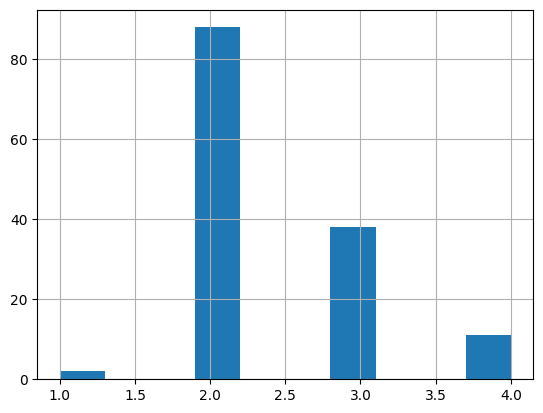

In [68]:
df_res3['price_num'].describe()
df_res3['price_num'].hist()


In [ ]:
df_res3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   image_url                     200 non-null    object 
 3   url                           200 non-null    object 
 4   review_count                  200 non-null    int64  
 5   rating                        200 non-null    float64
 6   transactions                  200 non-null    object 
 7   price                         139 non-null    object 
 8   phone                         200 non-null    object 
 9   coordinates.latitude          200 non-null    float64
 10  coordinates.longitude         200 non-null    float64
 11  location.city                 200 non-null    object 
 12  location.zip_code             200 non-null    int64  
 13  locat

 Teniendo en cuenta que los datos en este campo son del tipo float, y que hay mucha disparidad entre los valores, será conveniente imputar con la mediana.

In [ ]:
# imputar valores nulos con la mediana de la columna price_num

df_res3['price_num'].fillna(df_res3['price_num'].median(), inplace=True) # Imputar los valores nulos en 'price_num' con la mediana global de la columna.

In [72]:
df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,image_url,url,review_count,rating,transactions,phone,coordinates.latitude,coordinates.longitude,...,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases,aliases_2,price_num
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,[delivery],13124926262,41.884193,-87.647946,...,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]","newamerican, bars, bakeries",3.0
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"[pickup, delivery]",13124641744,41.890694,-87.624782,...,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]","tapasmallplates, mediterranean, newamerican",3.0
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,[delivery],13127923502,41.881689,-87.625006,...,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]","newamerican, seafood, breakfast_brunch",2.0
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"[pickup, delivery]",17737703427,41.917275,-87.698577,...,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]","cocktailbars, newamerican, speakeasies",2.0
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"[pickup, delivery]",13126670104,41.884680,-87.642322,...,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian],italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"[pickup, delivery]",17732525687,41.915105,-87.684639,...,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]","latin, venues, empanadas",2.0
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"[pickup, delivery]",17736612743,41.915980,-87.687550,...,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]","thai, panasian, desserts",2.0
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,[delivery],13128889613,41.854051,-87.685490,...,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]","filipino, mexican, hawaiian",2.0
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"[pickup, delivery]",0,41.943240,-87.653001,...,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]","indonesian, panasian, asianfusion",2.0


Eliminamos la columna `price` ya que ahora contamos con la columna `price_num` completa y en formato numérico, lo que facilita futuros análisis:

In [71]:
# Elimina columna 'price'

df_res3.drop(columns=['price'], inplace=True) # eliminamos la columna que ya no es necesaria 

In [73]:
df_res3.info() # Verificar que no haya valores nulos y los tipos de datos sean correctos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            200 non-null    object 
 1   alias                         200 non-null    object 
 2   image_url                     200 non-null    object 
 3   url                           200 non-null    object 
 4   review_count                  200 non-null    int64  
 5   rating                        200 non-null    float64
 6   transactions                  200 non-null    object 
 7   phone                         200 non-null    object 
 8   coordinates.latitude          200 non-null    float64
 9   coordinates.longitude         200 non-null    float64
 10  location.city                 200 non-null    object 
 11  location.zip_code             200 non-null    int64  
 12  location.country              200 non-null    object 
 13  locat

In [78]:
df_res3 # Mostramos el DataFrame actualizado para verificar los cambios

,id,alias,image_url,url,review_count,rating,transactions,phone,coordinates.latitude,coordinates.longitude,...,location.zip_code,location.country,location.state,location.display_address,address,similitud_direccion,similitud_direccion_menor_50,aliases,aliases_2,price_num
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,10512,4.4,[delivery],13124926262,41.884193,-87.647946,...,60607,US,IL,"['809 W Randolph', 'Chicago, IL 60607']",809 W Randolph,53,False,"[newamerican, bars, bakeries]","newamerican, bars, bakeries",3.0
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/8tga4i...,https://www.yelp.com/biz/the-purple-pig-chicag...,8861,4.3,"[pickup, delivery]",13124641744,41.890694,-87.624782,...,60611,US,IL,"['444 N Michigan Ave', 'Chicago, IL 60611']",444 N Michigan Ave,59,False,"[tapasmallplates, mediterranean, newamerican]","tapasmallplates, mediterranean, newamerican",3.0
2,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,2717,4.1,[delivery],13127923502,41.881689,-87.625006,...,60603,US,IL,"['12 S Michigan Ave', 'Chicago, IL 60603']",12 S Michigan Ave,58,False,"[newamerican, seafood, breakfast_brunch]","newamerican, seafood, breakfast_brunch",2.0
3,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,416,4.5,"[pickup, delivery]",17737703427,41.917275,-87.698577,...,60647,US,IL,"['2833 W Armitage Ave', 'Chicago, IL 60647']",2833 W Armitage Ave,60,False,"[cocktailbars, newamerican, speakeasies]","cocktailbars, newamerican, speakeasies",2.0
4,cgIuo3geaxw1Sfhbqm5qTA,alla-vita-chicago-4,https://s3-media0.fl.yelpcdn.com/bphoto/X4XMxK...,https://www.yelp.com/biz/alla-vita-chicago-4?a...,744,4.4,"[pickup, delivery]",13126670104,41.884680,-87.642322,...,60661,US,IL,"['564 W Randolph St', 'Chicago, IL 60661']",564 W Randolph St,58,False,[italian],italian,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,F7IQngaDDBgYvhA3U31q-g,irazú-costa-rican-restaurant-and-catering-chic...,https://s3-media0.fl.yelpcdn.com/bphoto/nmi1Bd...,https://www.yelp.com/biz/iraz%C3%BA-costa-rica...,2511,4.3,"[pickup, delivery]",17732525687,41.915105,-87.684639,...,60647,US,IL,"['1865 N Milwaukee Ave', 'Chicago, IL 60647']",1865 N Milwaukee Ave,62,False,"[latin, venues, empanadas]","latin, venues, empanadas",2.0
196,kuJLjqq0m_tWfkgkMV6WrA,sweet-rice-asian-kitchen-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/pGYpkY...,https://www.yelp.com/biz/sweet-rice-asian-kitc...,94,4.6,"[pickup, delivery]",17736612743,41.915980,-87.687550,...,60647,US,IL,"['1904 N Western Ave', 'Chicago, IL 60647']",1904 N Western Ave,59,False,"[thai, panasian, desserts]","thai, panasian, desserts",2.0
197,db7p4tMxC_pptYho8RUhzQ,aloha-wagon-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/5DJYjS...,https://www.yelp.com/biz/aloha-wagon-chicago?a...,279,4.8,[delivery],13128889613,41.854051,-87.685490,...,60608,US,IL,"['2023 S Western Ave', 'Chicago, IL 60608']",2023 S Western Ave,59,False,"[filipino, mexican, hawaiian]","filipino, mexican, hawaiian",2.0
198,9nFfjQKo2YvttOG7ppqjQQ,rendang-republic-chicago,https://s3-media0.fl.yelpcdn.com/bphoto/Rk6418...,https://www.yelp.com/biz/rendang-republic-chic...,46,4.3,"[pickup, delivery]",0,41.943240,-87.653001,...,60657,US,IL,"['3355 N Clark St', 'Chicago, IL 60657']",3355 N Clark St,55,False,"[indonesian, panasian, asianfusion]","indonesian, panasian, asianfusion",2.0


Como último paso, exportamos este DataFrame que ya está normalizado y listo para análisis:

In [79]:
# exportar el DataFrame final a un archivo CSV

df_res3.to_csv('Datos_YELP_limpios_VC.csv', index=False) # Exportar el DataFrame limpio a un archivo CSV sin incluir el índice

## **Conclusiones generales**

----
# Índice

- [1. Conexión a la API de Yelp](#Conexion-a-la-API-de-YELP)
- [2. Análisis exploratorio de datos](#Exploracion-del-DataFrame)
- [3. Limpieza de datos](#Limpieza-de-datos)
- [4. Conclusiones](#Conclusiones-generales)
--------

### **Resumen del Trabajo Realizado**

Este segundo avance del proyecto integrador logró conectar exitosamente con la **API de Yelp** para obtener datos de restaurantes en Chicago, transformando información cruda de 200 establecimientos gastronómicos en un dataset estructurado y listo para análisis. El proceso integró la recolección de datos externos con técnicas avanzadas de limpieza, complementando la base de usuarios del Avance 1.

### **Principales Problemas Resueltos**

#### **1. Obtención y Estructuración de Datos Externos**
- **Conexión API exitosa**: Se superaron las limitaciones de la API de Yelp (50 registros máximo por consulta) mediante solicitudes múltiples con parámetros de offset
- **Normalización JSON**: Transformación eficiente de estructuras anidadas a formato tabular manejable
- **Persistencia de datos**: Almacenamiento local para evitar consultas repetitivas a la API

#### **2. Depuración de Redundancias**
- **Análisis de similitud**: Uso de FuzzyWuzzy para comparar columnas aparentemente duplicadas con precisión cuantitativa
- **Consolidación inteligente**: Unificación de direcciones fragmentadas y eliminación de teléfonos/nombres redundantes
- **Optimización estructural**: Reducción de 24 columnas iniciales a 15 variables relevantes

#### **3. Transformación de Datos Complejos**
- **Estructuras anidadas**: Conversión exitosa de strings con formato JSON a objetos Python reales usando ast.literal_eval
- **Categorización avanzada**: Extracción y normalización de categorías de restaurantes para análisis posterior
- **Estandarización numérica**: Conversión de símbolos de precio ($, $$, $$$) a valores enteros procesables

### **Metodología de Imputación Innovadora**

La estrategia de tratamiento de valores nulos fue particularmente interesante:

1. **Imputación contextual por categorías**: Los valores faltantes en precios se imputaron usando la media de restaurantes con categorías similares
2. **Respaldo estadístico**: Valores residuales se trataron con media global para minimizar sesgos
3. **Trazabilidad completa**: Creación de columna indicadora para identificar valores imputados
4. **Validación de coherencia**: Verificación de que las imputaciones mantuvieran la lógica del negocio

### **Resultados Técnicos Obtenidos**

El dataset final de restaurantes presenta:
- **Completitud**: 199 registros sin valores nulos en variables críticas
- **Consistencia**: Tipos de datos apropiados y estructura optimizada
- **Relevancia**: 15 columnas estratégicamente seleccionadas y ordenadas por importancia
- **Calidad**: Información validada y lista para análisis de mercado gastronómico

### **Integración Estratégica con Avance 1**

Este segundo entregable complementa perfectamente el trabajo previo:

- **Coherencia geográfica**: Ambos datasets están centrados en Chicago
- **Compatibilidad analítica**: Los datos de restaurantes se alinean con los perfiles de usuarios ya limpiados
- **Preparación para modelado**: Estructura lista para análisis de coincidencias y recomendaciones

### **Innovaciones Metodológicas Aplicadas**

1. **Función de imputación personalizada**: Desarrollo de lógica específica para tratamiento contextualizado de valores faltantes
2. **Análisis de similitud automatizado**: Uso de métricas cuantitativas para decisiones de consolidación
3. **Transformación de tipos de datos avanzada**: Manejo eficiente de estructuras complejas (listas, diccionarios)
4. **Optimización de estructura**: Reordenamiento estratégico de columnas por relevancia analítica

### **Valor Agregado para Análisis Posteriores**

Este trabajo proporciona:

1. **Ecosistema completo**: Datos tanto de usuarios como de establecimientos gastronómicos
2. **Base para recomendaciones**: Información estructurada para modelos de matching
3. **Insights de mercado**: Datos listos para análisis de tendencias gastronómicas en Chicago
4. **Escalabilidad**: Metodología replicable para otras ciudades

### **Próximos Pasos del Proyecto**

Los siguientes avances incluirán:
- **Análisis exploratorio conjunto** de usuarios y restaurantes
- **Desarrollo de modelos de recomendación** basados en preferencias alimenticias y características de establecimientos
- **Identificación de oportunidades de mercado** mediante cruce de datos de oferta y demanda
- **Generación de insights accionables** para estrategias de marketing personalizado

### **Desafíos Superados**

1. **Limitaciones de API**: Maximización de datos obtenidos dentro de restricciones técnicas
2. **Complejidad estructural**: Manejo exitoso de datos anidados y formatos diversos
3. **Calidad heterogénea**: Estrategias diferenciadas según el tipo y contexto de cada variable
4. **Coherencia temática**: Mantenimiento de relevancia para el contexto gastronómico de Chicago

### **Lecciones Aprendidas**

Este proceso destacó la importancia de:
- **Planificación de APIs**: Entender limitaciones antes de implementar soluciones
- **Flexibilidad metodológica**: Adaptar técnicas de limpieza según las características específicas de cada dataset
- **Validación continua**: Verificar la coherencia de transformaciones en cada paso
- **Documentación exhaustiva**: Registrar decisiones para asegurar reproducibilidad y comprensión

### **Reflexión Final**

La obtención y limpieza de datos de restaurantes no solo completó el ecosistema de información necesario para el proyecto, sino que demostró la importancia de integrar fuentes de datos externas de manera sistemática y rigurosa. El dataset de restaurantes de Chicago representa ahora un complemento estratégico que, junto con los datos de usuarios del Avance 1, proporciona una visión 360° del mercado gastronómico.

Este segundo avance establece las bases técnicas y metodológicas para análisis avanzados que permitirán a InsightReach desarrollar estrategias de marketing digital altamente personalizadas y efectivas.

---

> **Nota**: Este segundo avance completa la fase de preparación de datos del proyecto integrador. Los análisis específicos, modelos predictivos y recomendaciones estratégicas se desarrollarán en los siguientes entregables, aprovechando la solidez y calidad de ambos datasets integrados.